In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_validate,train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
train_data = pd.read_csv('train_modified.csv')
# Disbursed的值就是二元分类的输出
train_data['Disbursed'].value_counts()

0    19680
1      320
Name: Disbursed, dtype: int64

In [10]:
x_columns = [x for x in train_data.columns if x not in ['Disbursed','ID']]
X = train_data[x_columns]
y = train_data['Disbursed']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [52]:
y_pre = gbc.predict(X_test)
# 我们取的是label为1的概率，如果roc_auc的值大，就说明预测样本中大部分标签都为0.
y_preprob = gbc.predict_proba(X_test)[:,1]

In [27]:
print('Accuracy : %.4f'%metrics.accuracy_score(y_test,y_pre))

Accuracy : 0.9855


In [53]:
# ROC曲线的面积就是AUC，AUC用于衡量二分类问题机器学习算法的泛化能力的
print('AUC Score (Test): %f'%metrics.roc_auc_score(y_test,y_preprob))

AUC Score (Test): 0.811032


一般学习率都会初始设置为0.1，首先找出最好的迭代次数

In [58]:
param1 = {'n_estimators':range(20,81,10)}
gscv = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,
                                                         min_samples_split=300,
                                                         min_samples_leaf=20,
                                                         max_depth=8,
                                                         max_features='sqrt',
                                                         subsample=0.8,
                                                         random_state=10),
                   param_grid = param1,scoring='roc_auc',iid=False,cv=5)
gscv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [84]:
gscv.best_score_,gscv.best_params_,gscv.cv_results_['mean_test_score']

(0.8192660696138212,
 {'n_estimators': 60},
 array([0.81284735, 0.81437929, 0.81403709, 0.81592869, 0.81926607,
        0.81721608, 0.81485328]))

最好的迭代次数为60，然后对GradientBoostingClassifier的参数进行设置，找到各个参数对应的最好的数字，当把用到的参数一个一个设置好后，再次对学习率和迭代次数进行设置，这里进行调参时，可以按照学习率降低1倍，迭代次数增加1倍，以降低过拟合的可能。

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
X,y = make_regression(20, 1, noise=10)

In [144]:
gbr = GradientBoostingRegressor(min_samples_split=2,min_samples_leaf=5)

In [145]:
gbr.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [146]:
gbr_preds = gbr.predict(X)

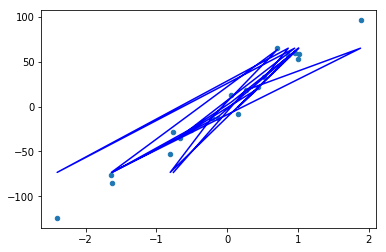

In [147]:
plt.scatter(X, y, s=20)
plt.plot(X,gbr_preds,color='blue')